In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load Data

In [2]:
from sklearn.datasets import load_boston
data=load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\sobuj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

# Data Pre-Processing

In [3]:
data.feature_names
data.data
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
df=pd.DataFrame(data.data)
df.columns=data.feature_names
df['MEDV']=data.target
df=df.astype(dtype=np.float32)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


# EDA

In [5]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.199997  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900002  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.099998  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.799999  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200001  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.099998  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.699997  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300003  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.800003  2.5050  1.0  273.0   

       

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136780,6.860353,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574898,28.148861,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537109,187.00000,279.000000,330.000000,666.000000,711.000000


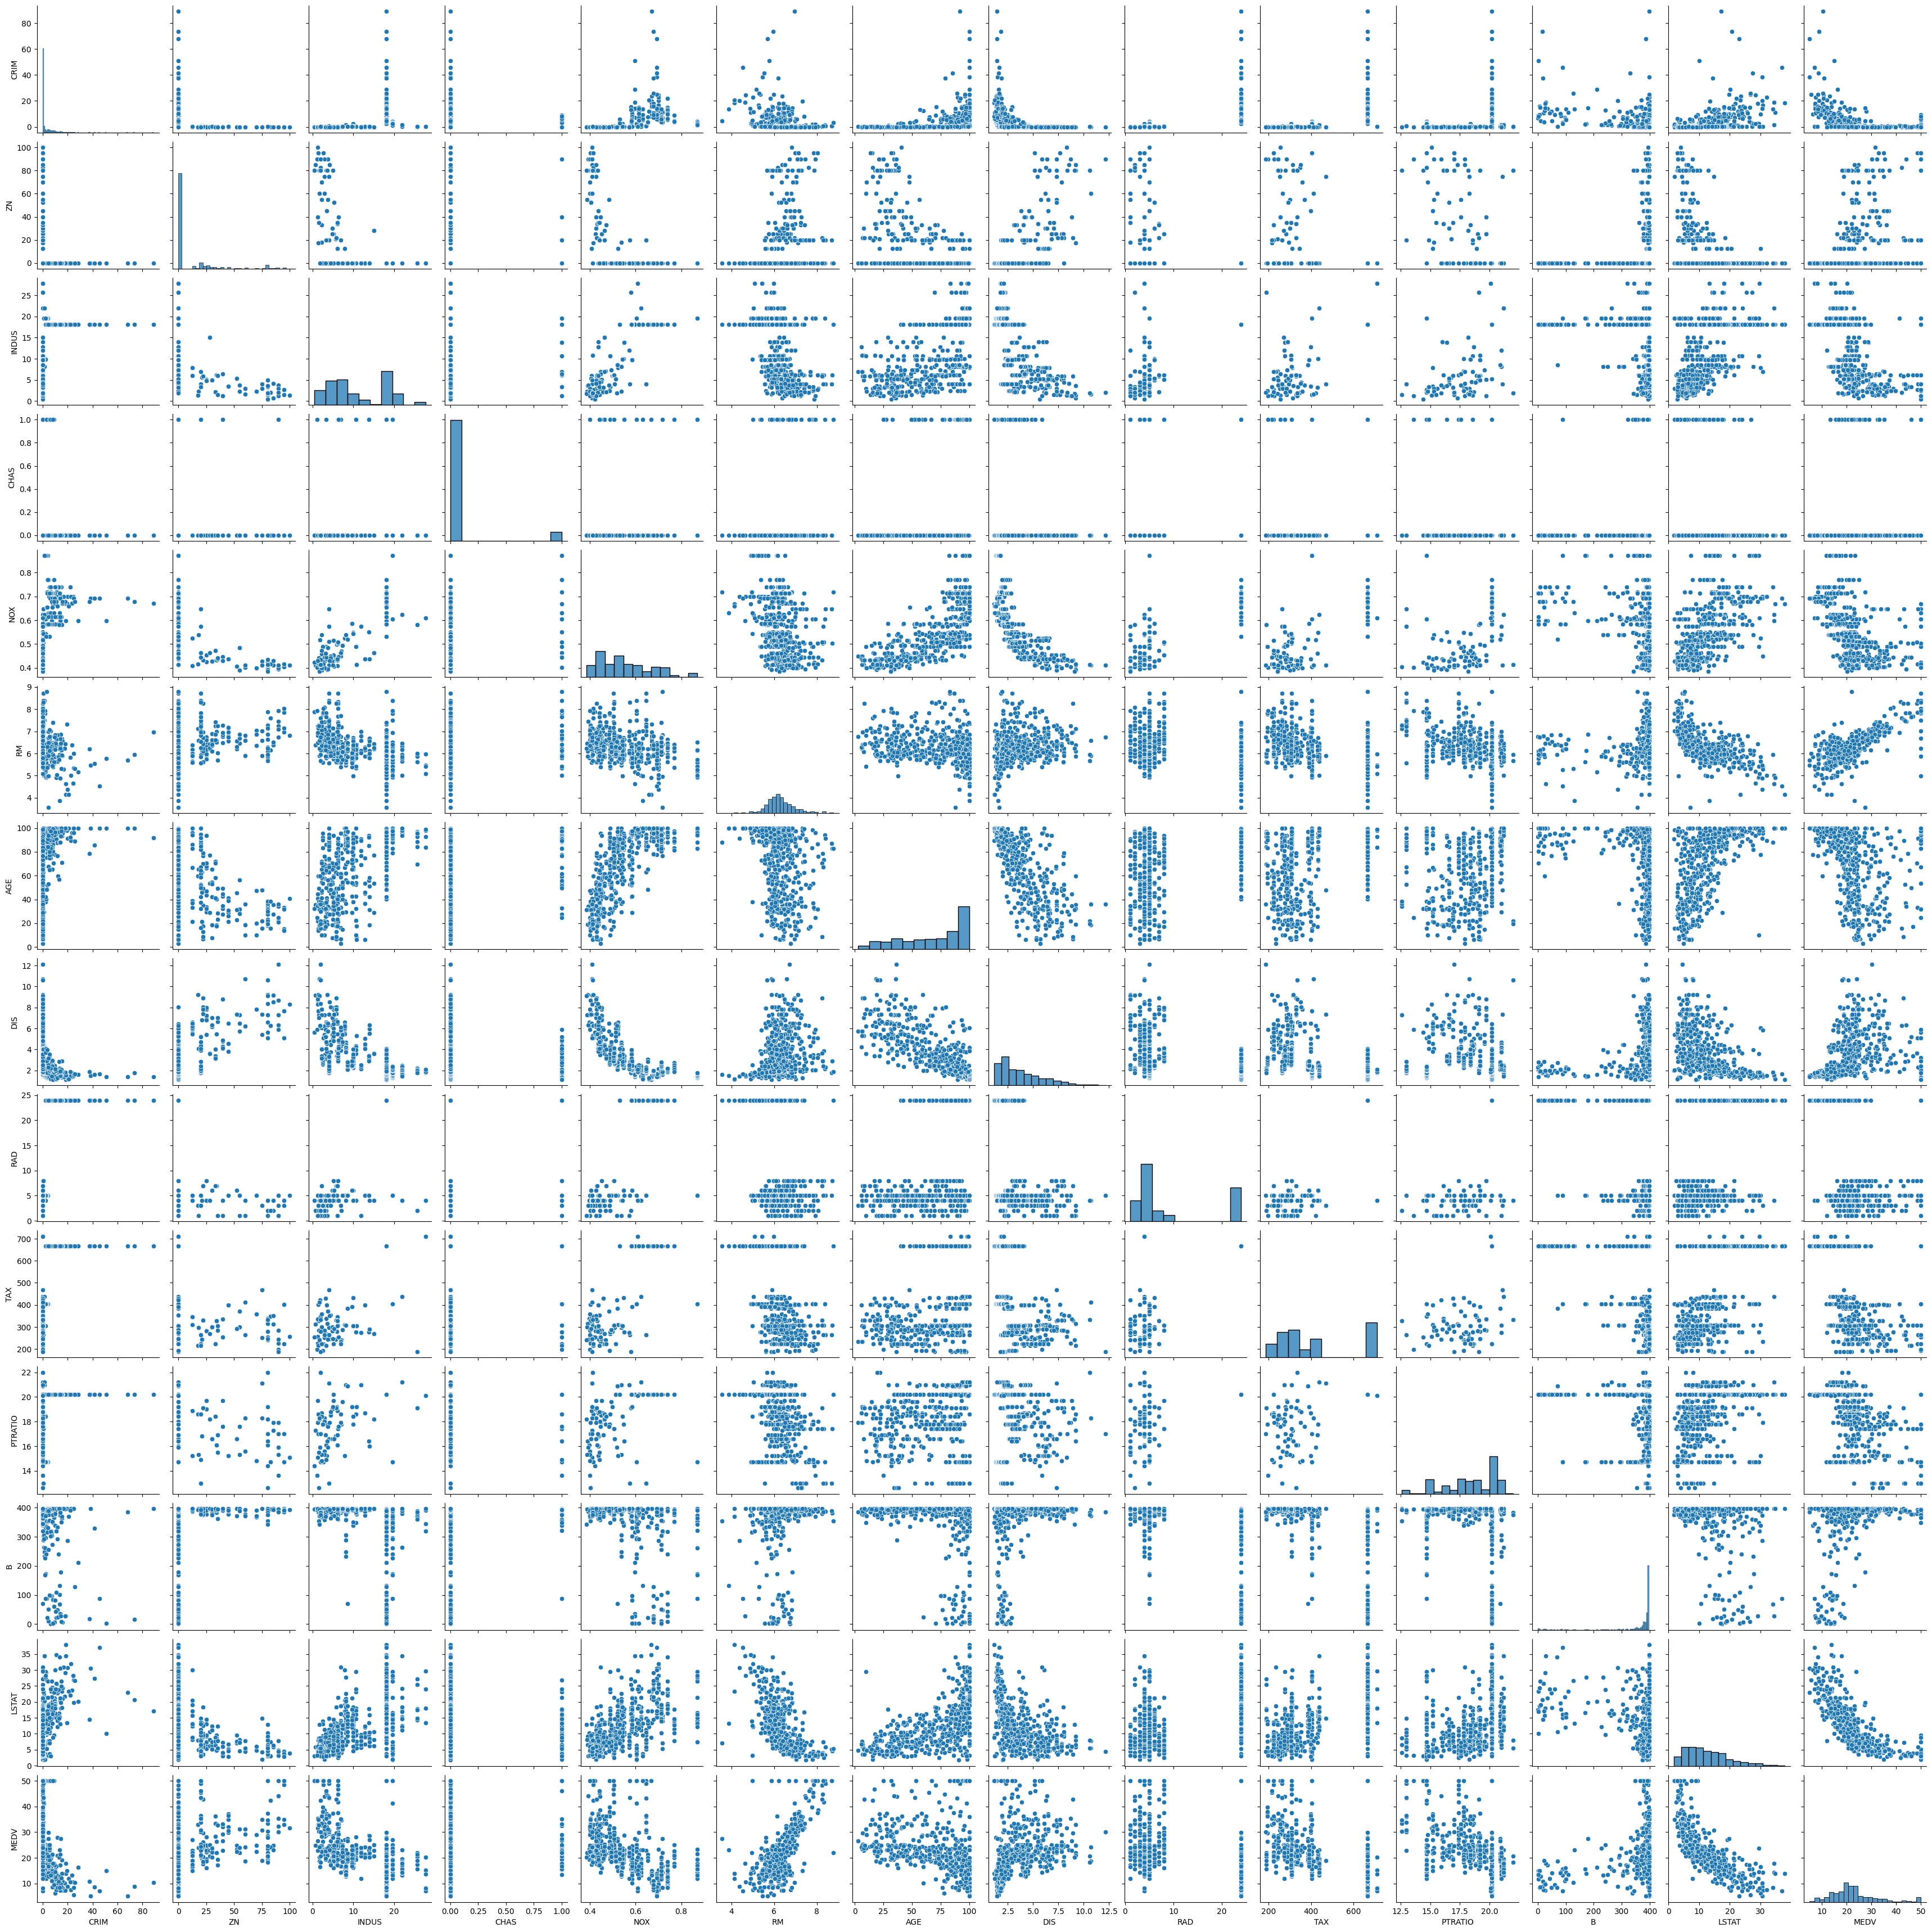

In [7]:
sns.pairplot(data=df)

In [ ]:
corr=df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

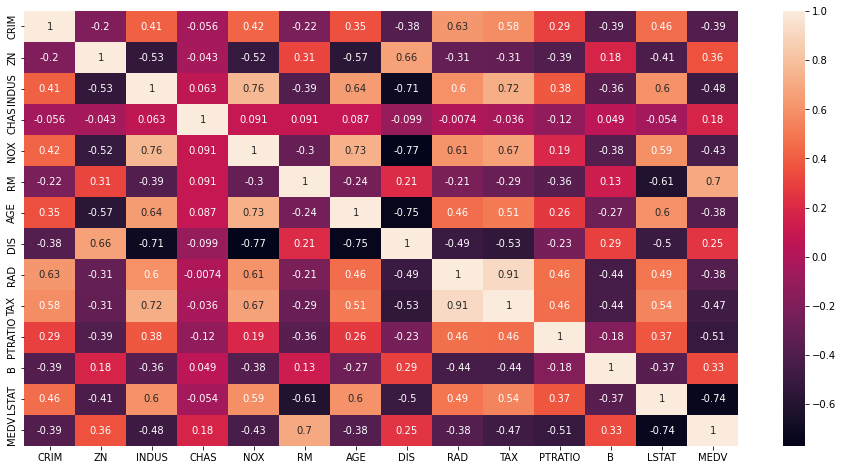

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

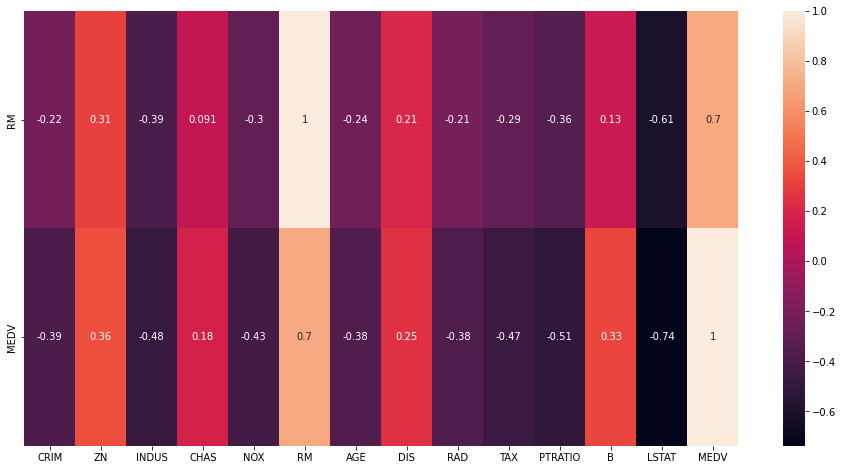

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(corr[corr["MEDV"]>.5],annot=True)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

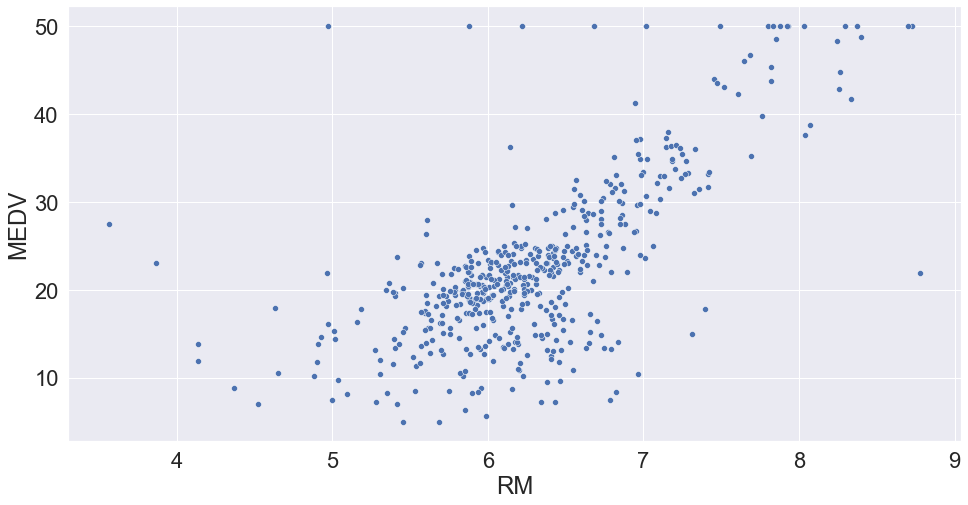

In [ ]:
from turtle import color

plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x="RM", y="MEDV")

# Find Outliers

<AxesSubplot:>

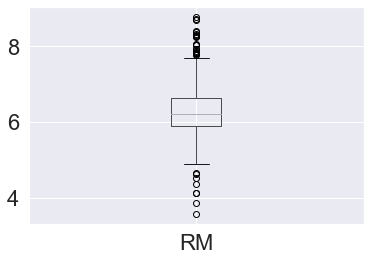

In [ ]:
df[['RM']].boxplot()

In [ ]:
q3=np.quantile(df.RM,0.75)
q1=np.quantile(df.RM,.25)
iqr=q3-q1
q3
q1
iqr


0.7379997968673706

In [ ]:
rm_medv=df[['RM','MEDV']].copy()
rm_medv

,RM,MEDV
0,6.575,24.000000
1,6.421,21.600000
2,7.185,34.700001
3,6.998,33.400002
4,7.147,36.200001
...,...,...
501,6.593,22.400000
502,6.120,20.600000
503,6.976,23.900000
504,6.794,22.000000


In [ ]:
max_extreem_outliers_index=rm_medv[rm_medv['RM']>q3+iqr*1.5].index
min_extreem_outliers_index=rm_medv[rm_medv['RM']<q1-iqr*1.5].index
min_extreem_outliers_index
rm_medv.drop(max_extreem_outliers_index,inplace=True)
rm_medv.drop(min_extreem_outliers_index,inplace=True)


<AxesSubplot:>

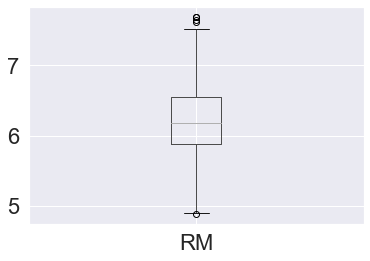

In [ ]:
rm_medv[["RM"]].boxplot()

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

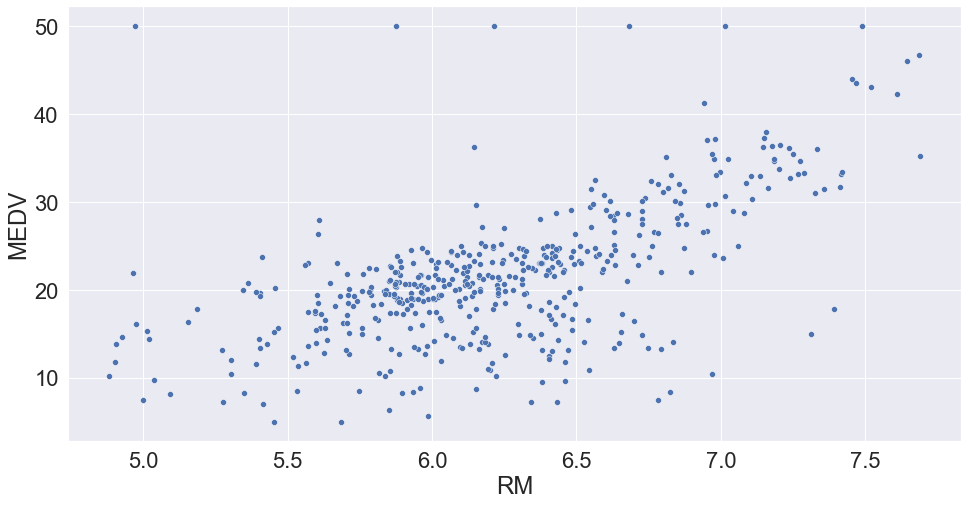

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=rm_medv, x="RM", y="MEDV")

# Feature Engineering and Selection

In [ ]:
x=rm_medv[['RM']]
y=rm_medv['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(
    x,y,test_size=0.25,random_state=42
)

In [ ]:
xtrain,xtest

(        RM
 454  6.728
 249  6.718
 265  5.560
 353  6.728
 134  5.757
 ..     ...
 108  6.474
 291  7.148
 372  5.875
 465  5.759
 104  6.167
 
 [357 rows x 1 columns],
         RM
 497  5.794
 33   5.701
 133  5.822
 72   6.065
 78   6.232
 ..     ...
 66   5.787
 491  5.983
 86   6.015
 31   6.072
 84   6.389
 
 [119 rows x 1 columns])

In [ ]:
ytrain,ytest

(          MEDV
 454  14.900000
 249  26.200001
 265  22.799999
 353  30.100000
 134  15.600000
 ..         ...
 108  19.799999
 291  37.299999
 372  50.000000
 465  19.900000
 104  20.100000
 
 [357 rows x 1 columns],
           MEDV
 497  18.299999
 33   13.100000
 133  18.400000
 72   22.799999
 78   21.200001
 ..         ...
 66   19.400000
 491  13.600000
 86   22.500000
 31   14.500000
 84   23.900000
 
 [119 rows x 1 columns])

# Modeling

In [ ]:
w=(np.sum(xtrain['RM'*ytrain]))